In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
from ipywidgets import *
warnings.filterwarnings("ignore")
plt.style.use('ggplot')


In [2]:
df = pd.read_csv('./data/data_preprocessed.csv')

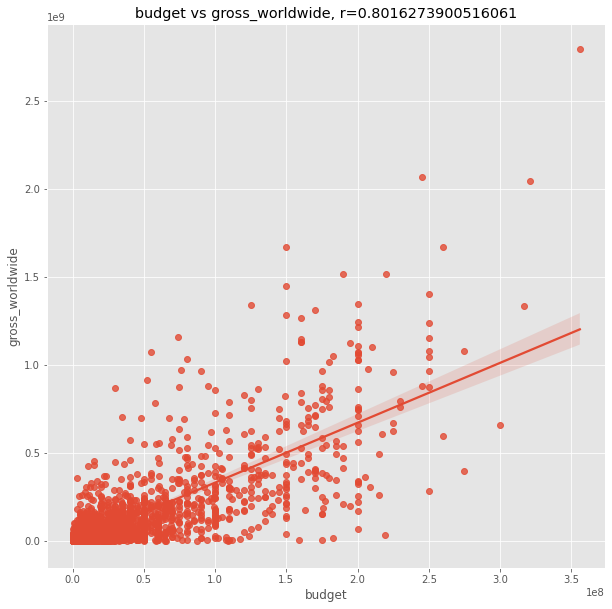

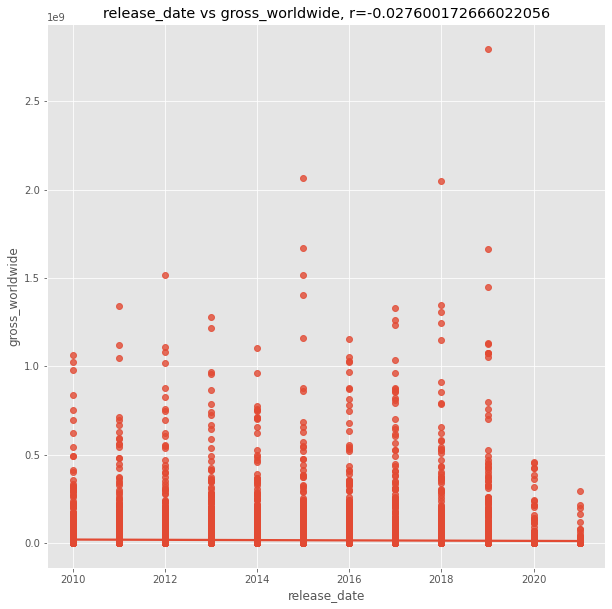

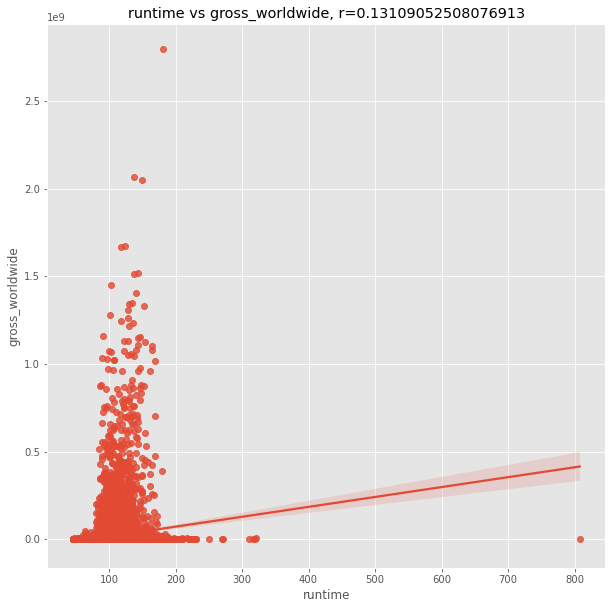

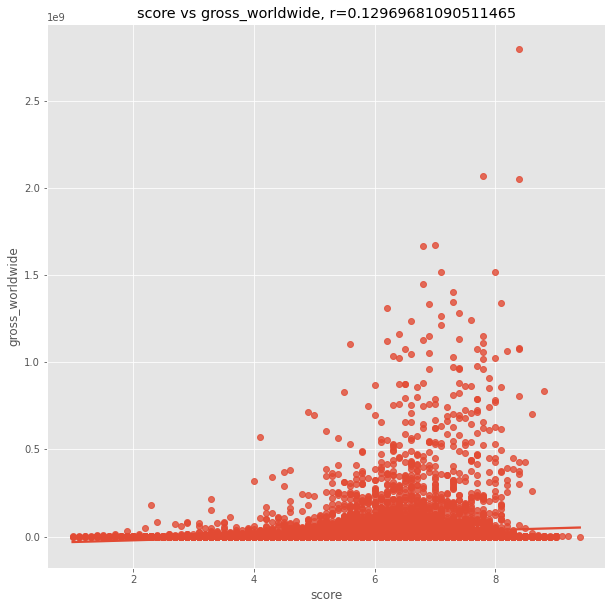

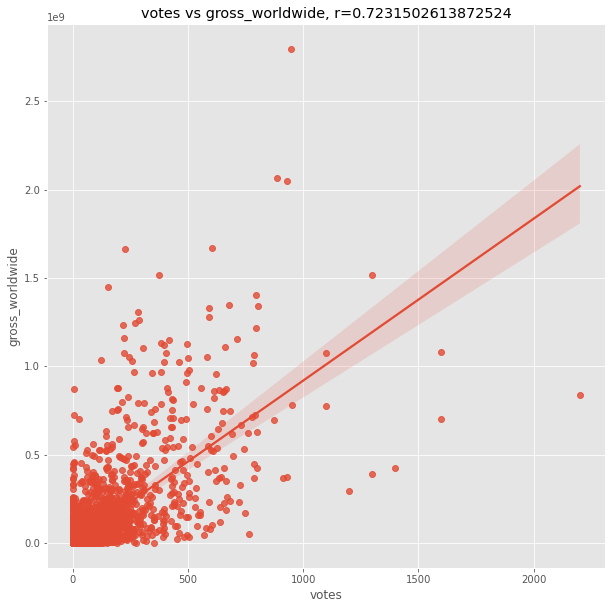

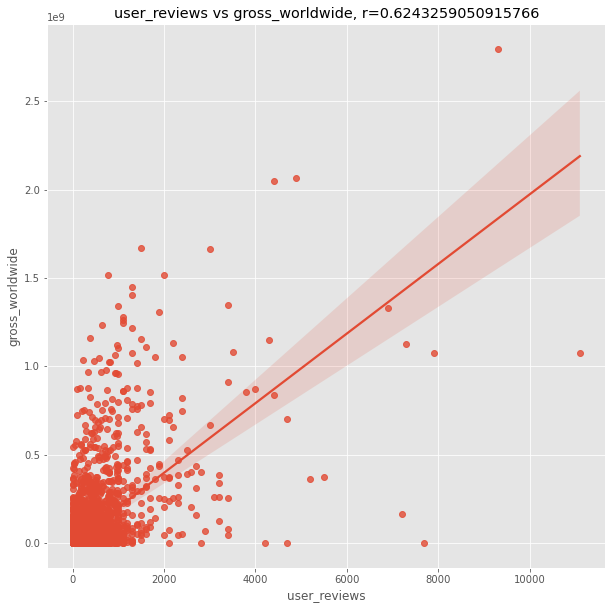

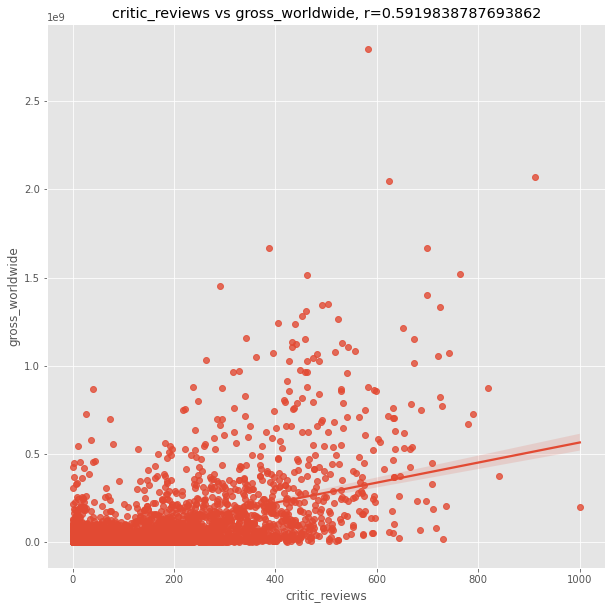

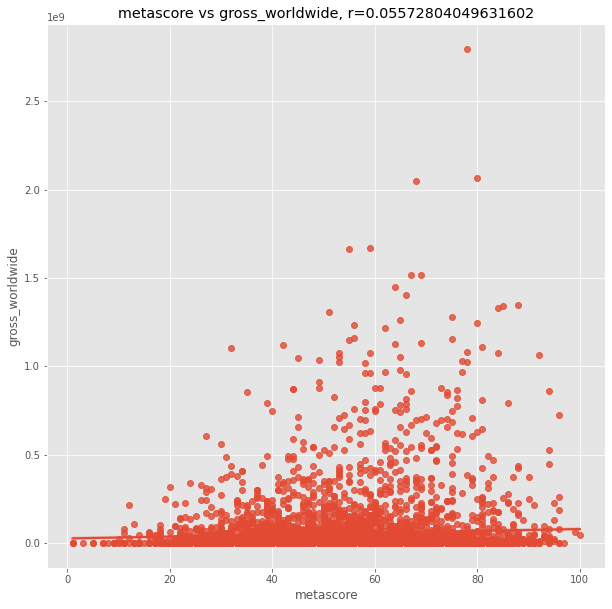

In [25]:
features = ['budget', 'release_date', 'runtime', 'score', 'votes', 'user_reviews', 'critic_reviews', 'metascore']

for feature in features:
    plt.figure(figsize=(10, 10))
    sns.regplot(x=feature, y='gross_worldwide', data = df)
    plt.title(f"{feature} vs gross_worldwide, r={df.corr()['gross_worldwide'][feature]}")
    plt.savefig(f'./graphs/don_bien/{feature}_vs_gross_worldwide', transparent=False)
    plt.show()

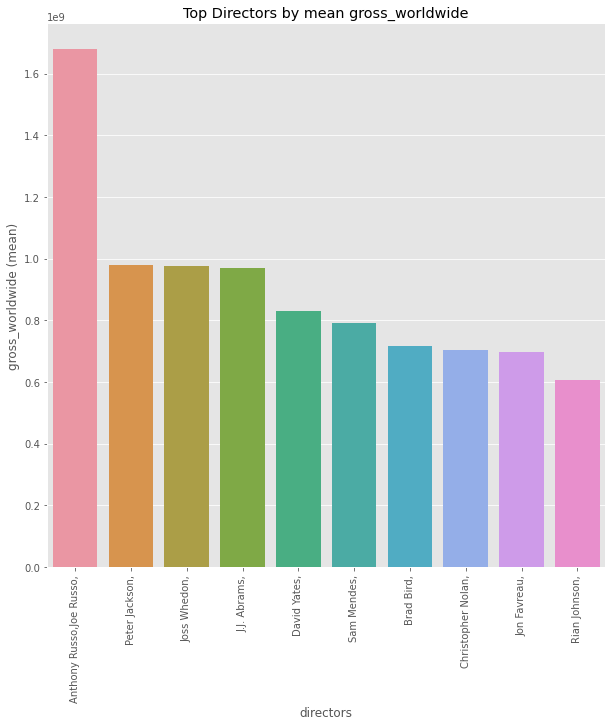

In [28]:
plt.figure(figsize=(10, 10))
vc = df.directors.value_counts()
listD = vc[vc.values > 2].index
top_gross = df[df.directors.isin(listD)].groupby('directors', as_index=False)['gross_worldwide'].mean()
top_gross_sorted = top_gross.sort_values('gross_worldwide', ascending=False)
sns.barplot(x='directors', y='gross_worldwide', data=top_gross_sorted.head(10))
plt.xticks(rotation=90)
plt.ylabel('gross_worldwide (mean)')
plt.title('Top Directors by mean gross_worldwide')
plt.savefig('./graphs/don_bien/top10_director_by_agross')
plt.show()

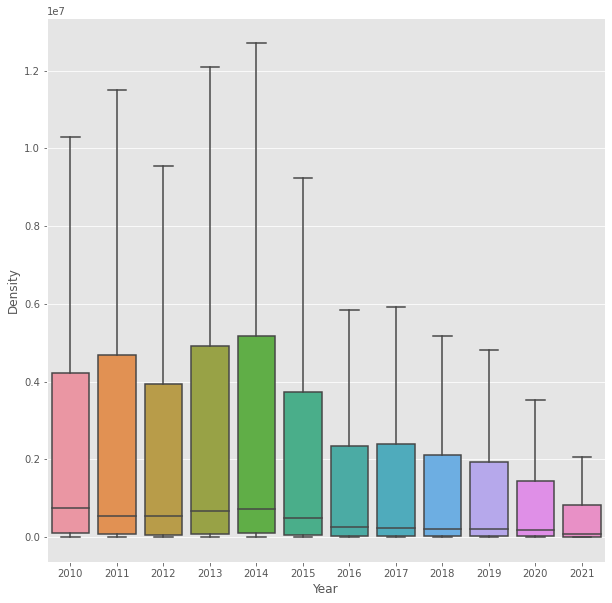

In [30]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df["gross_worldwide"], x=df["release_date"],
            showfliers=False, order=[x for x in range(2010, 2022)])
plt.xlabel('Year')
plt.ylabel('Density') 

plt.show()

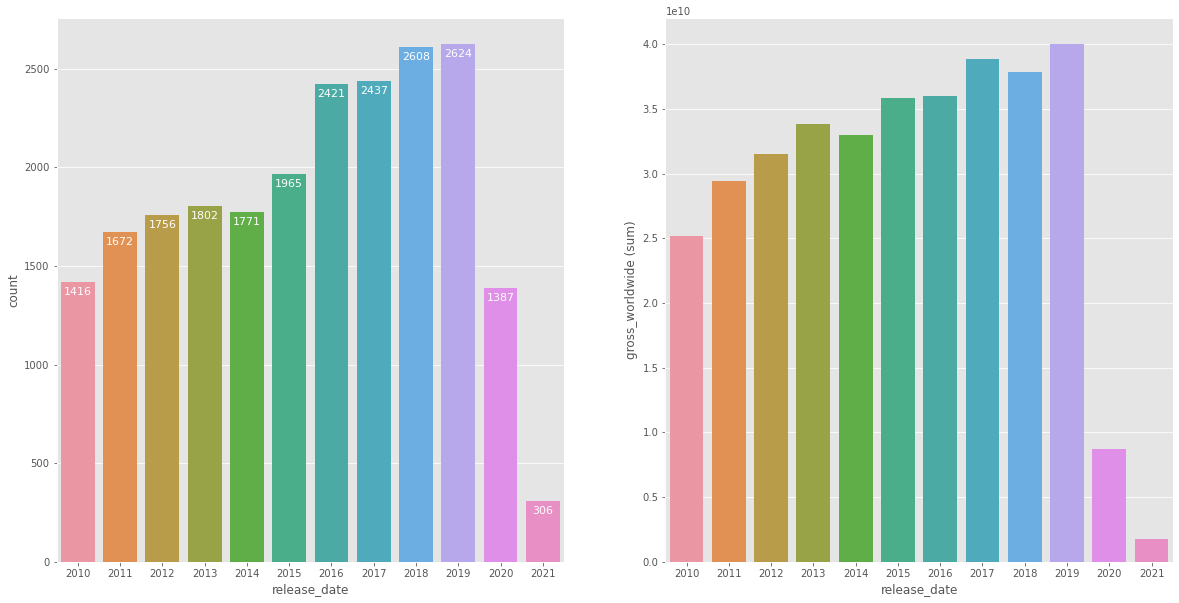

In [6]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 10)) 
sns.countplot(x="release_date", data=df, order=[x for x in range(2010, 2022)], ax=ax[0])
temp = df.groupby('release_date', as_index=False)['gross_worldwide'].sum()
sns.barplot(x='release_date', y='gross_worldwide', data=temp, order=[x for x in range(2010, 2022)], ax=ax[1])  
ax[1].set_ylabel('gross_worldwide (sum)') 
for p in ax[0].patches:
    ax[0].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='white', xytext=(0, -10),
                textcoords='offset points')

Text(0, 0.5, 'gross_worldwide (sum)')

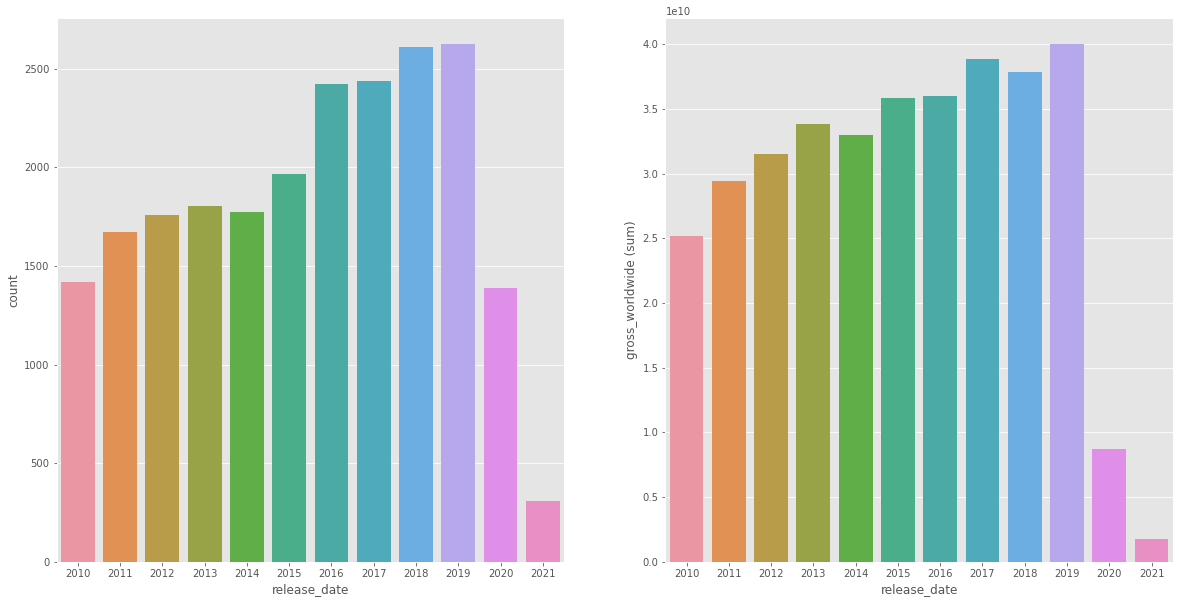

In [7]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 10)) 
sns.countplot(x="release_date", data=df, order=[x for x in range(2010, 2022)], ax=ax[0])
temp = df.groupby('release_date', as_index=False)['gross_worldwide'].sum()
sns.barplot(x='release_date', y='gross_worldwide', data=temp, order=[x for x in range(2010, 2022)], ax=ax[1])  
ax[1].set_ylabel('gross_worldwide (sum)') 

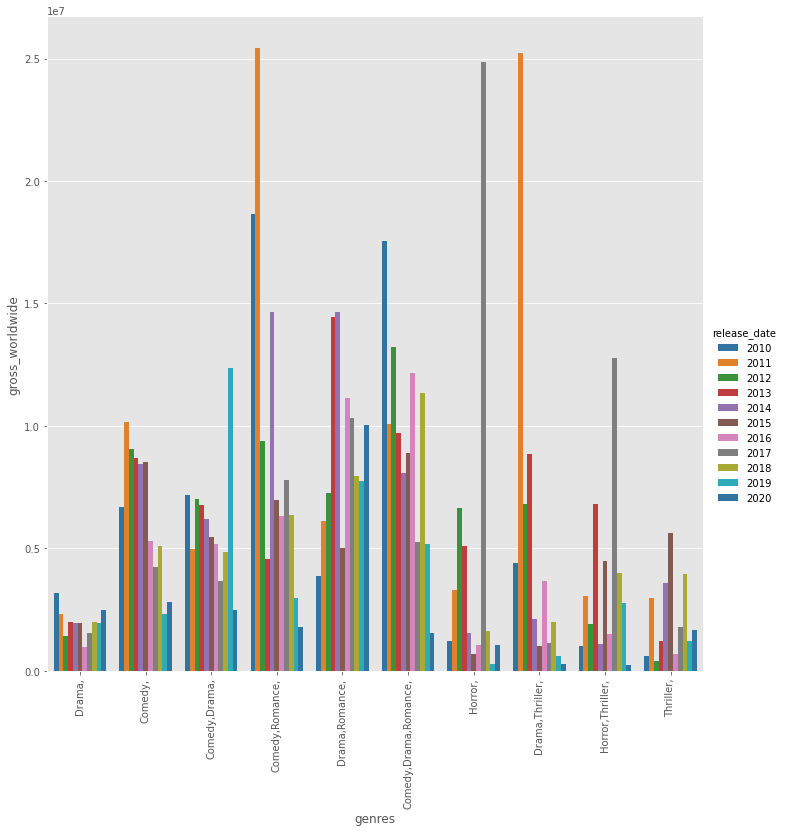

In [8]:
sns.catplot(x = "genres",       # x variable name
            y = "gross_worldwide",       # y variable name
            hue = "release_date",  # group variable name
            data = df,     # dataframe to plot
            order=df.genres.value_counts().index[0:10],
            hue_order=range(2010, 2021),
            height=10, 
            dodge=True,
            palette='tab10', 
            ci=None,
            kind = "bar")

plt.xticks(fontsize=10, rotation=90)  
plt.yticks(fontsize=10) 
plt.show()

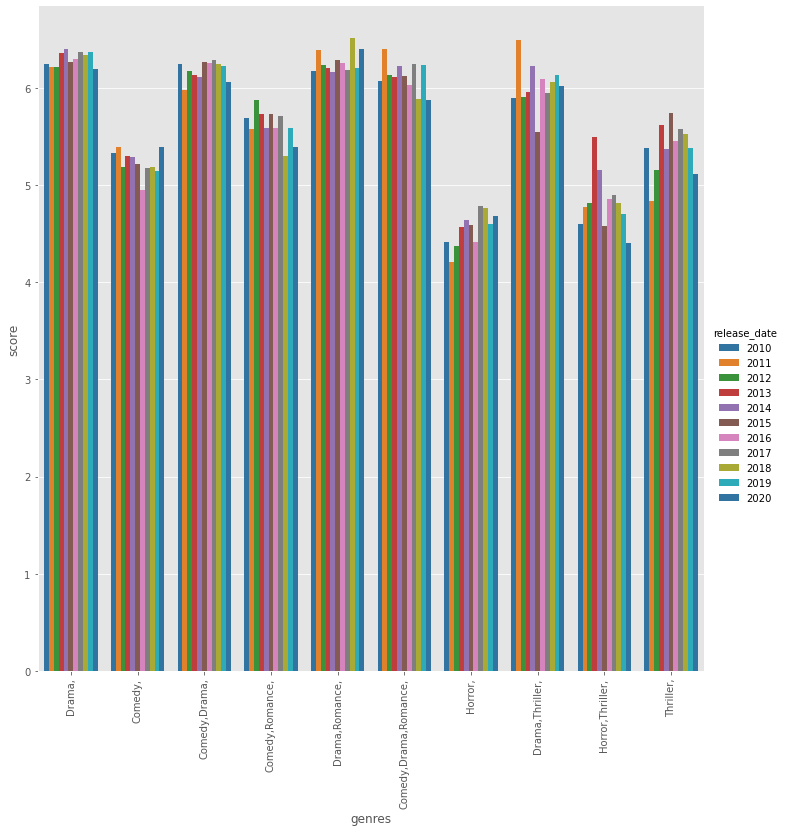

In [9]:
sns.catplot(x = "genres",       # x variable name
            y = "score",       # y variable name
            hue = "release_date",  # group variable name
            data = df,     # dataframe to plot
            order=df.genres.value_counts().index[0:10],
            hue_order=range(2010, 2021),
            height=10, 
            dodge=True,
            palette='tab10', 
            ci=None,
            kind = "bar")

plt.xticks(fontsize=10, rotation=90)  
plt.yticks(fontsize=10) 
plt.show()

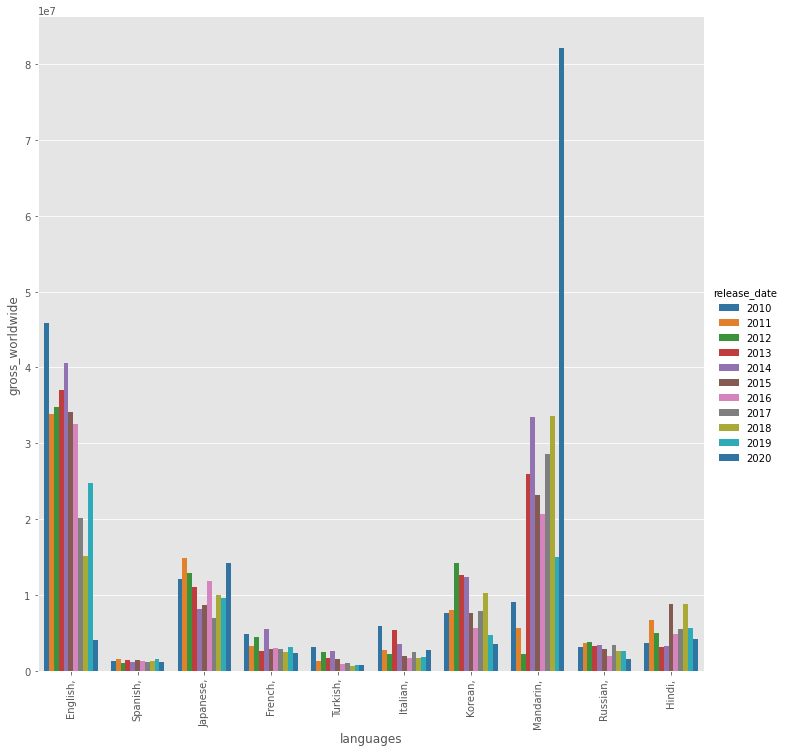

In [10]:
sns.catplot(x = "languages",       # x variable name
            y = "gross_worldwide",       # y variable name
            hue = "release_date",  # group variable name
            data = df,     # dataframe to plot
            order=df.languages.value_counts().index[0:10],
            hue_order=range(2010, 2021),
            height=10, 
            dodge=True,
            palette='tab10', 
            ci=None,
            kind = "bar")

plt.xticks(fontsize=10, rotation=90)  
plt.yticks(fontsize=10) 
plt.show()